In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier  # or your chosen model
import joblib

In [3]:
df = pd.read_csv('../data/heart_disease_selected.csv')
X = df.drop('target', axis=1)
y = df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (952, 11)
Testing set shape: (238, 11)


In [4]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'SVM': SVC(random_state=42, probability=True)
}


Training Logistic Regression
Accuracy: 0.8403
Precision: 0.8438
Recall: 0.8571
F1-Score: 0.8504
AUC: 0.9041

Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83       112
         1.0       0.84      0.86      0.85       126

    accuracy                           0.84       238
   macro avg       0.84      0.84      0.84       238
weighted avg       0.84      0.84      0.84       238



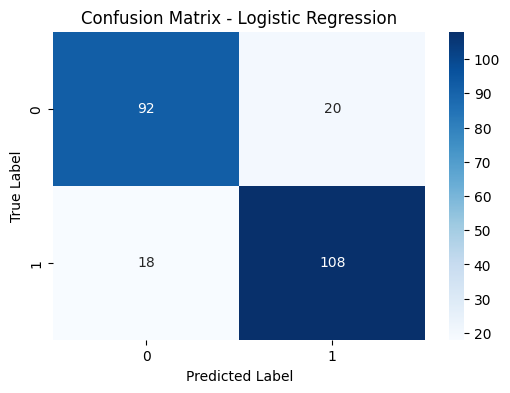


Training Decision Tree
Accuracy: 0.8782
Precision: 0.8819
Recall: 0.8889
F1-Score: 0.8854
AUC: 0.8775

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87       112
         1.0       0.88      0.89      0.89       126

    accuracy                           0.88       238
   macro avg       0.88      0.88      0.88       238
weighted avg       0.88      0.88      0.88       238



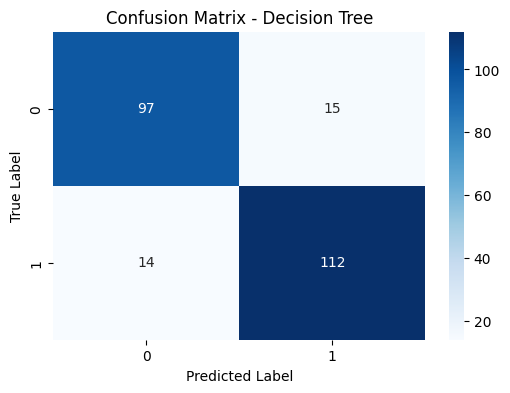


Training Random Forest
Accuracy: 0.9160
Precision: 0.9344
Recall: 0.9048
F1-Score: 0.9194
AUC: 0.9736

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91       112
         1.0       0.93      0.90      0.92       126

    accuracy                           0.92       238
   macro avg       0.92      0.92      0.92       238
weighted avg       0.92      0.92      0.92       238



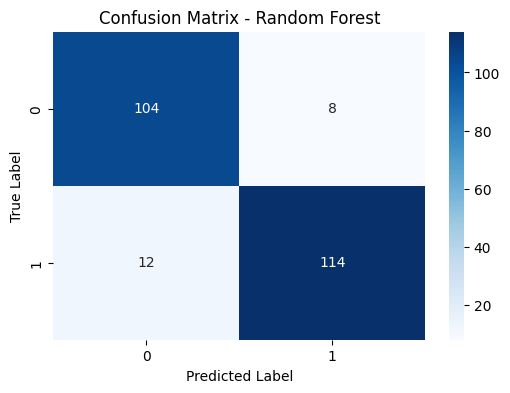


Training SVM
Accuracy: 0.8824
Precision: 0.8657
Recall: 0.9206
F1-Score: 0.8923
AUC: 0.9352

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87       112
         1.0       0.87      0.92      0.89       126

    accuracy                           0.88       238
   macro avg       0.88      0.88      0.88       238
weighted avg       0.88      0.88      0.88       238



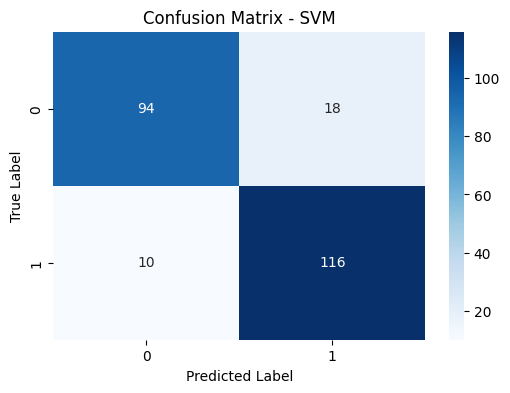

In [5]:
results = {}
roc_data = {}

for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Training {name}")
    print(f"{'='*50}")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }
    
    # Store ROC data
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    roc_data[name] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}
    
    # Print results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC: {roc_auc:.4f}")
    
    # Classification report
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


Model Performance Comparison:
                     Accuracy  Precision  Recall  F1-Score
Logistic Regression    0.8403     0.8438  0.8571    0.8504
Decision Tree          0.8782     0.8819  0.8889    0.8854
Random Forest          0.9160     0.9344  0.9048    0.9194
SVM                    0.8824     0.8657  0.9206    0.8923


<Figure size 1200x600 with 0 Axes>

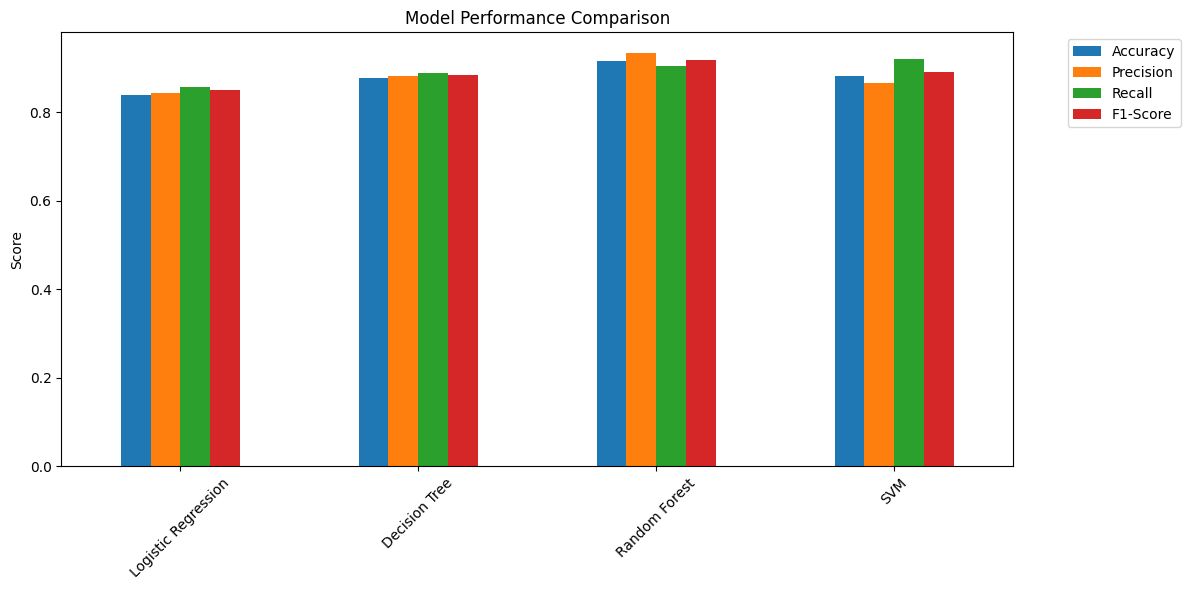

In [6]:
# Create comparison DataFrame
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df.round(4))

# Plot comparison
plt.figure(figsize=(12, 6))
results_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

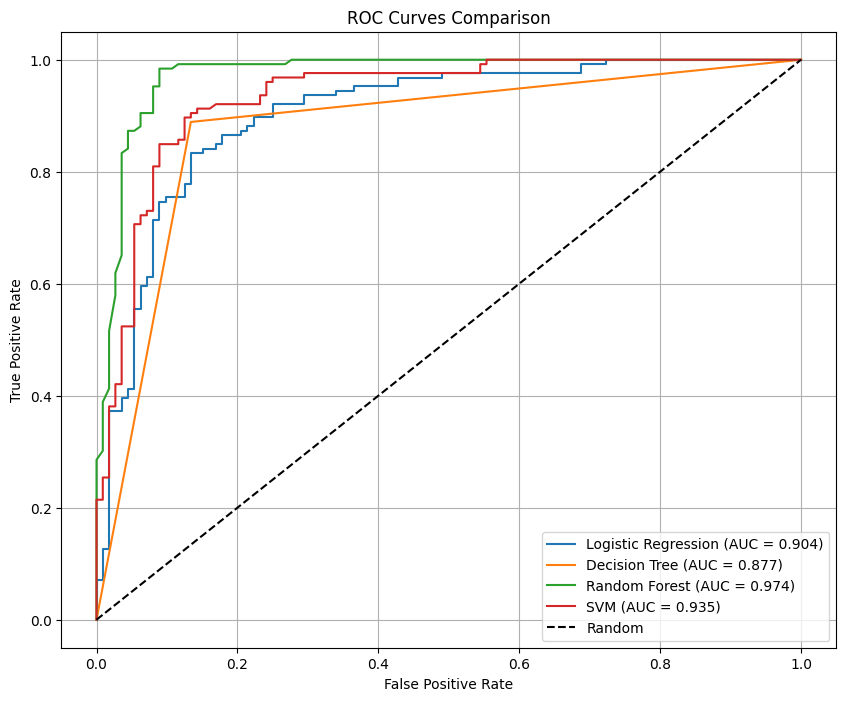

In [7]:
plt.figure(figsize=(10, 8))
for name, data in roc_data.items():
    plt.plot(data['fpr'], data['tpr'], label=f'{name} (AUC = {data["auc"]:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
# Find best model based on F1-score
best_model_name = results_df['F1-Score'].idxmax()
best_model = models[best_model_name]

print(f"\nBest Model: {best_model_name}")
print(f"Best F1-Score: {results_df.loc[best_model_name, 'F1-Score']:.4f}")


import joblib
joblib.dump(best_model, '../models/best_model.pkl')
print(f"Best model saved as '../models/best_model.pkl'")


Best Model: Random Forest
Best F1-Score: 0.9194
Best model saved as '../models/best_model.pkl'


In [9]:
# Save results to file
results_df.to_csv('../results/model_performance.csv')
print("Model performance results saved to '../results/model_performance.csv'")

Model performance results saved to '../results/model_performance.csv'


In [10]:
feature_names = [
    'age', 'sex', 'chest_pain_type', 'resting_bp_s', 'cholesterol',
    'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate', 'exercise_angina',
    'oldpeak', 'st_slope'
]

In [11]:
df = pd.read_csv('../data/heart_disease.csv')
X = df[feature_names]
y = df['target']

In [12]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(random_state=42))  # or your best model
])
pipeline.fit(X, y)

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2


In [13]:
joblib.dump(pipeline, '../models/heart_disease_pipeline.pkl')
print("Pipeline saved to ../models/heart_disease_pipeline.pkl")

Pipeline saved to ../models/heart_disease_pipeline.pkl
